In [1]:
## Training a machine learning model with scikit-learn

In [2]:
import numpy as np

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/Users/tpalczewski/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
knn = KNeighborsClassifier(n_neighbors=3)

In [6]:
## all parameters not defined in previous cell are set to their defaults

In [7]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [8]:
## Of course we need some data to make a data science :) 

In [9]:
## let's make feature matrix (X) and response vector (y)

In [10]:
N=5000 # Number of observations
M = 2 # Number of features
list_of_eveything = np.random.random((N,M))
print(list_of_eveything)

[[ 0.08880266  0.77087707]
 [ 0.99885526  0.31341436]
 [ 0.41691257  0.2625529 ]
 ..., 
 [ 0.80111516  0.13746786]
 [ 0.92889426  0.4224294 ]
 [ 0.58409318  0.55217073]]


In [11]:
X = list_of_eveything

In [12]:
what_is_what = np.random.randint(2, size=(N)) 
print(what_is_what)
# list of zeros (bkg) and ones (signal) 

[0 0 1 ..., 0 1 1]


In [13]:
y = what_is_what

In [14]:
print(X.shape)
print(y.shape)

(5000, 2)
(5000,)


In [15]:
## Fit the model with data (model training)

In [16]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
## Now we have a model so we can for example predict the response for a new observation

In [18]:
knn.predict([[0.2, 0.2]])

array([1])

In [19]:
## Plot the decision boundary; 
## Assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

In [20]:
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

In [21]:
print("[x_min, x_max] = [" + str(x_min) + ", " + str(x_max) + "]")

[x_min, x_max] = [-0.199944927832, 1.199988143]


In [22]:
print("[y_min, y_max] = [" + str(y_min) + ", " + str(y_max) + "]")

[y_min, y_max] = [-0.199974266827, 1.19987679234]


In [23]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

In [24]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

In [25]:
## Now we have the result so let's make tha plot of the decision boundary 

In [26]:
## Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

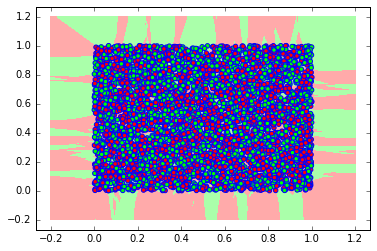

In [27]:
## Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='b', s=20)
plt.axis('tight')
plt.show()

In [28]:
## Nice, we have our clasifier up and running. Of course now we can check how this picture changes with k 

In [29]:
knn2 = KNeighborsClassifier(n_neighbors=50)

In [30]:
knn2.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [31]:
Z2 = knn2.predict(np.c_[xx.ravel(), yy.ravel()])

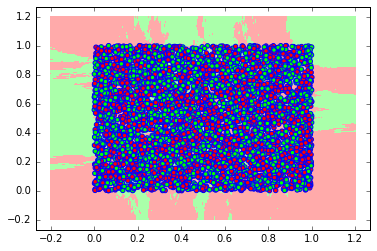

In [32]:
## Put the new result into a color plot
Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z2, cmap=cmap_light)

## Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='b', s=20)
plt.axis('tight')
plt.show()

In [33]:
## The optimal algorithm for a given dataset is a complicated choice, and depends on a number of factors:
## number of samples N (observations) and dimensionality (features)
## More about choosing the right estimator - http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [34]:
## Calculate accuracy
from sklearn import metrics

In [35]:
## Make class predictions for the testing set
y_pred_class = knn.predict(X)
y_pred_class2 = knn2.predict(X)

In [36]:
print(metrics.accuracy_score(y, y_pred_class2))

0.548


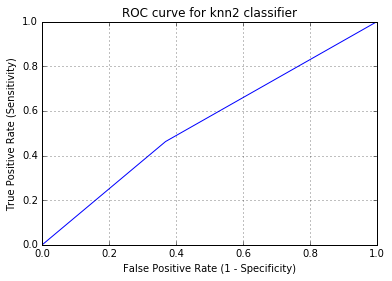

In [37]:
## ROC Curves and Area Under the Curve (AUC)
## IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_class2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for knn2 classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [38]:
## Confusion matrix
confusion = metrics.confusion_matrix(y, y_pred_class2)
TP2 = confusion[1, 1] # True Positive
TN2 = confusion[0, 0] # True Negative
FP2 = confusion[0, 1] # False Positive ("Type I error")
FN2 = confusion[1, 0] # False Negative ("Type II error")

In [39]:
print(metrics.confusion_matrix(y, y_pred_class2))

[[1596  931]
 [1329 1144]]


In [40]:
## Table for knn2

In [41]:
import tabletext
data2 = [[" " , "Predicted 0" , "Predicted 1" ],
        ["True 0", TP2, TN2],
        ["True 1", FP2 ,FN2],
        ]
print tabletext.to_text(data2)

┌────────┬─────────────┬─────────────┐
│        │ Predicted 0 │ Predicted 1 │
├────────┼─────────────┼─────────────┤
│ True 0 │        1144 │        1596 │
├────────┼─────────────┼─────────────┤
│ True 1 │         931 │        1329 │
└────────┴─────────────┴─────────────┘


In [42]:
## Table for knn

In [43]:
## Confusion matrix
confusion = metrics.confusion_matrix(y, y_pred_class)
TP = confusion[1, 1] # True Positive
TN = confusion[0, 0] # True Negative
FP = confusion[0, 1] # False Positive ("Type I error")
FN = confusion[1, 0] # False Negative ("Type II error")

In [44]:
data = [[" " , "Predicted 0" , "Predicted 1" ],
        ["True 0", TP, TN],
        ["True 1", FP ,FN],
        ]
print tabletext.to_text(data)

┌────────┬─────────────┬─────────────┐
│        │ Predicted 0 │ Predicted 1 │
├────────┼─────────────┼─────────────┤
│ True 0 │        1859 │        1901 │
├────────┼─────────────┼─────────────┤
│ True 1 │         626 │         614 │
└────────┴─────────────┴─────────────┘
